# This notebook is an example of a few dump of ADCP data

## import some libraries and prepare notebook

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import math

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 270

#use importer to solve relative path
import importer



In [2]:
#import some netcdf helper
from sonar_netcdf.utils.nc_reader import NcReader
from sonar_netcdf.utils.nc_reader_presenter import NcReaderPresenter

In [3]:
#help(NcReaderPresenter.dump_content)

In [4]:
#help(NcReaderPresenter.dump_groups)

## Set file path

In [5]:
file_path=  "C:/Users/lberger/Desktop/Data selection for Simrad EC150_OS150/EC150 raw/HYDROMOMAR-D20200904-T093757.nc"


In [6]:
#open the file 
reader = NcReader(file_path)
presenter = NcReaderPresenter(reader)

The ncReader is mainly used as an interface to ease reading of variable lenght datasets (like backscatter_r) and to reduced dimensions to always plot a max 2 variable


# Show Sonar data

## Display current_velocity_geographical_north




Variable <class 'netCDF4._netCDF4.Variable'>
vlen current_velocity_geographical_north(ping_time)
    units: m/s
    long_name: Calculated water current velocity values for the geographical north direction
    valid_range: [-50.  50.]
vlen data type: float32
path = /Sonar/Beam_group1/ADCP
unlimited dimensions: ping_time
current shape = (293,) : /Sonar/Beam_group1/ADCP/current_velocity_geographical_north
<class 'netCDF4._netCDF4.Variable'>
vlen current_velocity_geographical_north(ping_time)
    units: m/s
    long_name: Calculated water current velocity values for the geographical north direction
    valid_range: [-50.  50.]
vlen data type: float32
path = /Sonar/Beam_group1/ADCP
unlimited dimensions: ping_time
current shape = (293,)
Vlen variable /Sonar/Beam_group1/ADCP/current_velocity_geographical_north : reduced shape for display is  ('ping_time',) ((293,))
Variable : /Sonar/Beam_group1/ADCP/current_velocity_geographical_north size =(11290, 293)
statistics min:-8.681987 max:8.66013

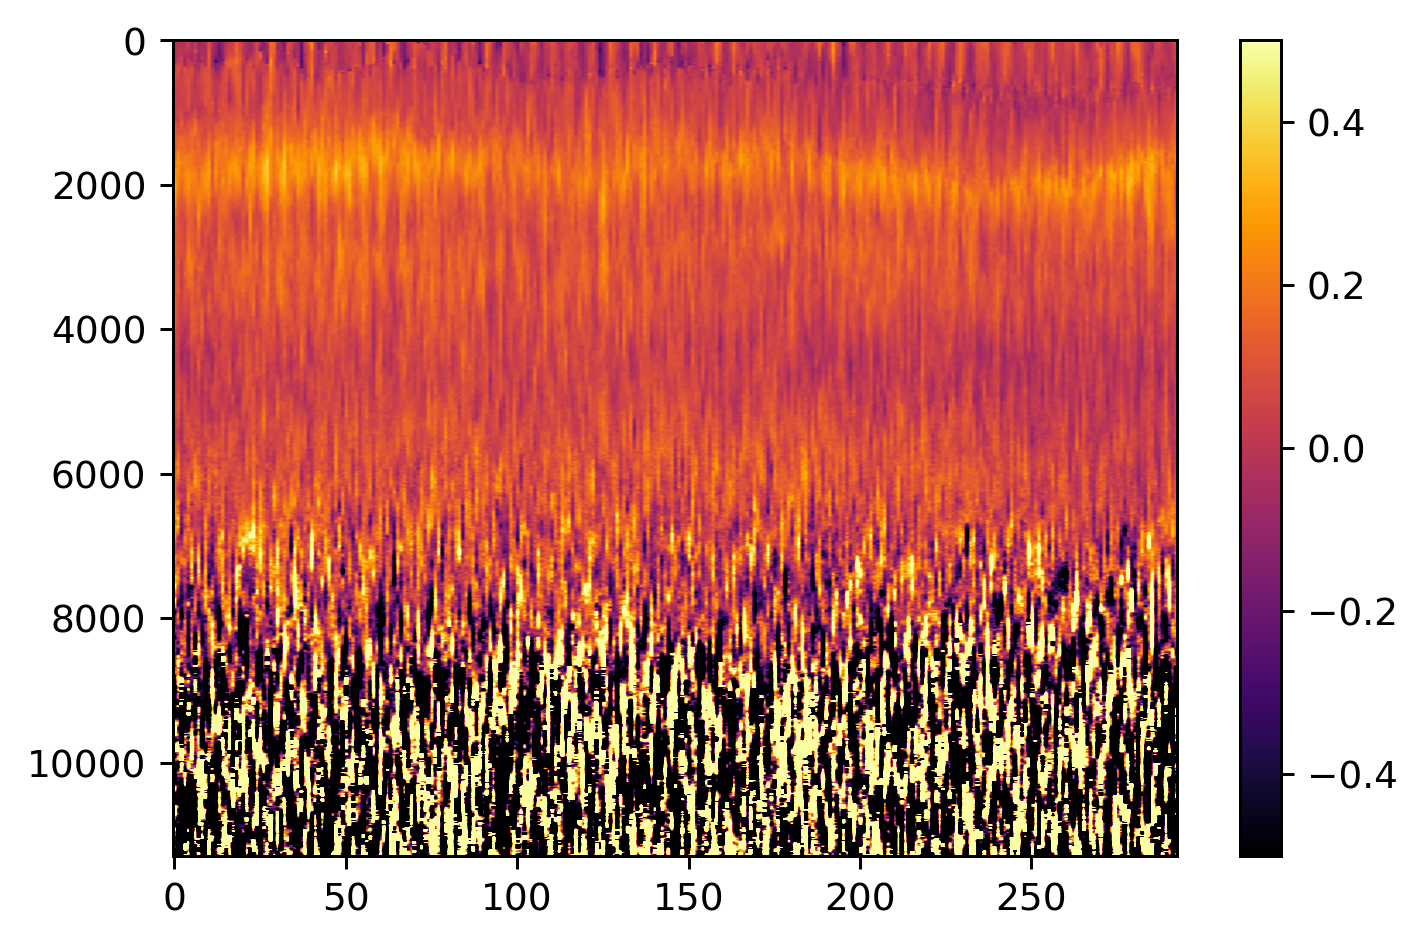

In [7]:

values=presenter.dump_content(root="Sonar/Beam_group1/ADCP/current_velocity_geographical_north",cmap="inferno",vmin=-0.5,vmax=0.5)


## Display mean current_velocity_geographical_north 
avraging is done by EC150 and averaging window size is available in Sonar/Beam_group1/ADCP/Mean_current/averaging




Variable <class 'netCDF4._netCDF4.Variable'>
vlen current_velocity_geographical_north(mean_time)
    units: m/s
    long_name: Calculated water current velocity values for the geographical north direction
    valid_range: [-50.  50.]
vlen data type: float32
path = /Sonar/Beam_group1/ADCP/Mean_current
unlimited dimensions: mean_time
current shape = (293,) : /Sonar/Beam_group1/ADCP/Mean_current/current_velocity_geographical_north
<class 'netCDF4._netCDF4.Variable'>
vlen current_velocity_geographical_north(mean_time)
    units: m/s
    long_name: Calculated water current velocity values for the geographical north direction
    valid_range: [-50.  50.]
vlen data type: float32
path = /Sonar/Beam_group1/ADCP/Mean_current
unlimited dimensions: mean_time
current shape = (293,)
Vlen variable /Sonar/Beam_group1/ADCP/Mean_current/current_velocity_geographical_north : reduced shape for display is  ('mean_time',) ((293,))
Variable : /Sonar/Beam_group1/ADCP/Mean_current/current_velocity_geographi

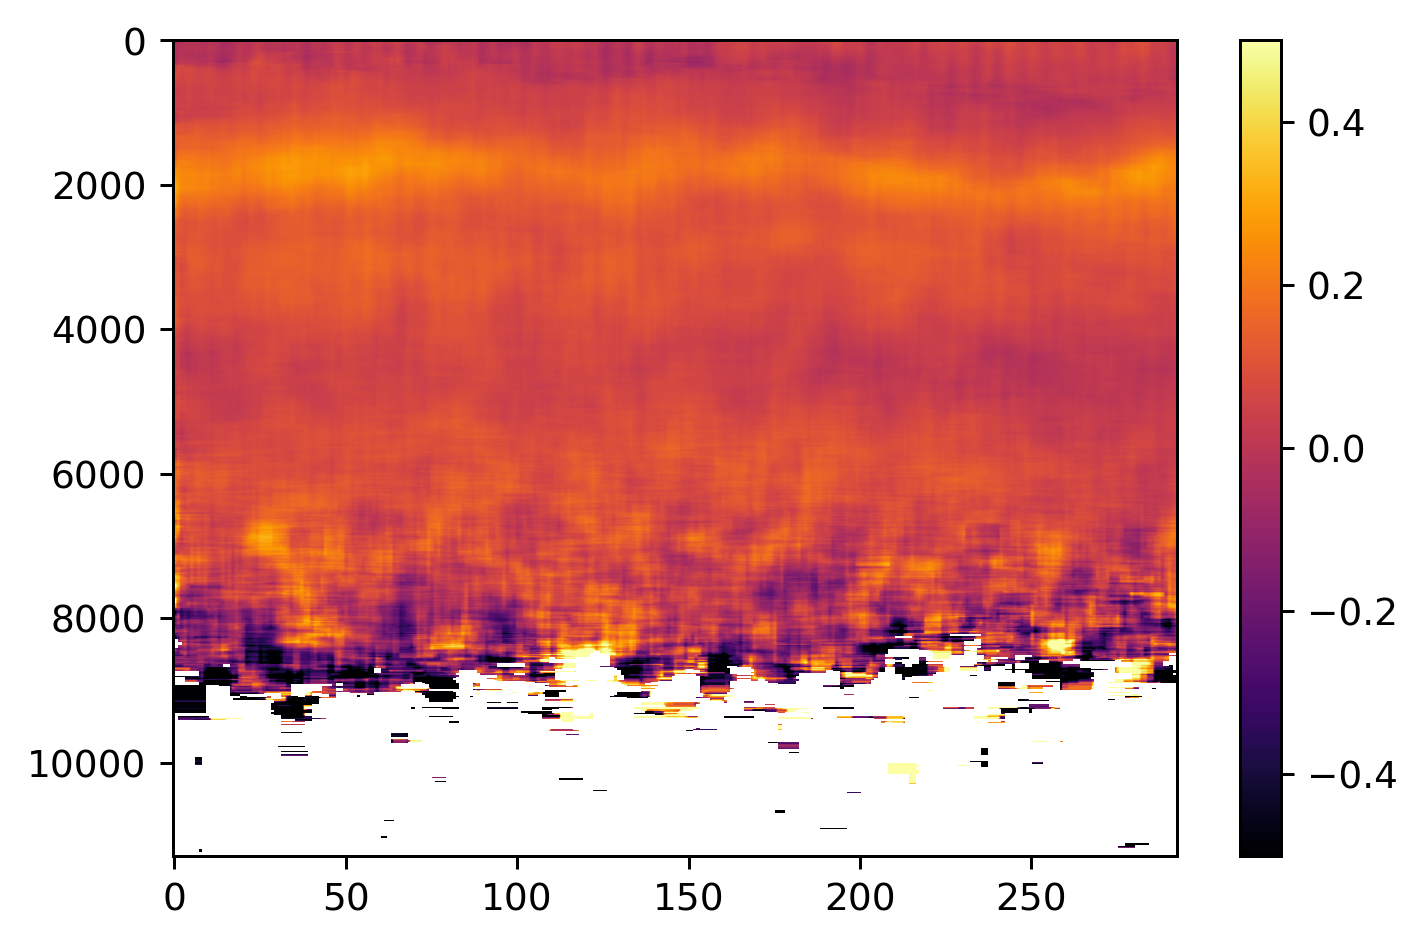

In [8]:


values=presenter.dump_content(root="Sonar/Beam_group1/ADCP/Mean_current/current_velocity_geographical_north",cmap="inferno",vmin=-0.5,vmax=0.5)


In [9]:
import matplotlib.pyplot as plt
def plot(vname,values,depth,threshold):
    print(">Variable : " + vname)
    print("\tstatistics min:" + str(np.nanmin(values)) + " max:" + str(np.nanmax(values)))
    #plt.figure()
    if len(values.shape) == 1:
        plt.plot(values)
    else:
        plt.imshow(values, aspect='auto', cmap=plt.get_cmap("jet"),extent=[0, len(values[0]), -depth[(len(depth) - 1)], -depth[0]], vmin=threshold[0], vmax=threshold[1])
        plt.colorbar()
    plt.title(vname)
    plt.show()

#  Compute and plot power value beam 1 in dB

Vlen variable /Sonar/Beam_group1/backscatter_r : reduced shape for display is  ('ping_time',) ((293,))
Vlen variable /Sonar/Beam_group1/backscatter_i : reduced shape for display is  ('ping_time',) ((293,))


0.006666666666666667

>Variable : Pr beam 1
	statistics min:-175.84550713880014 max:-10.204409151776694


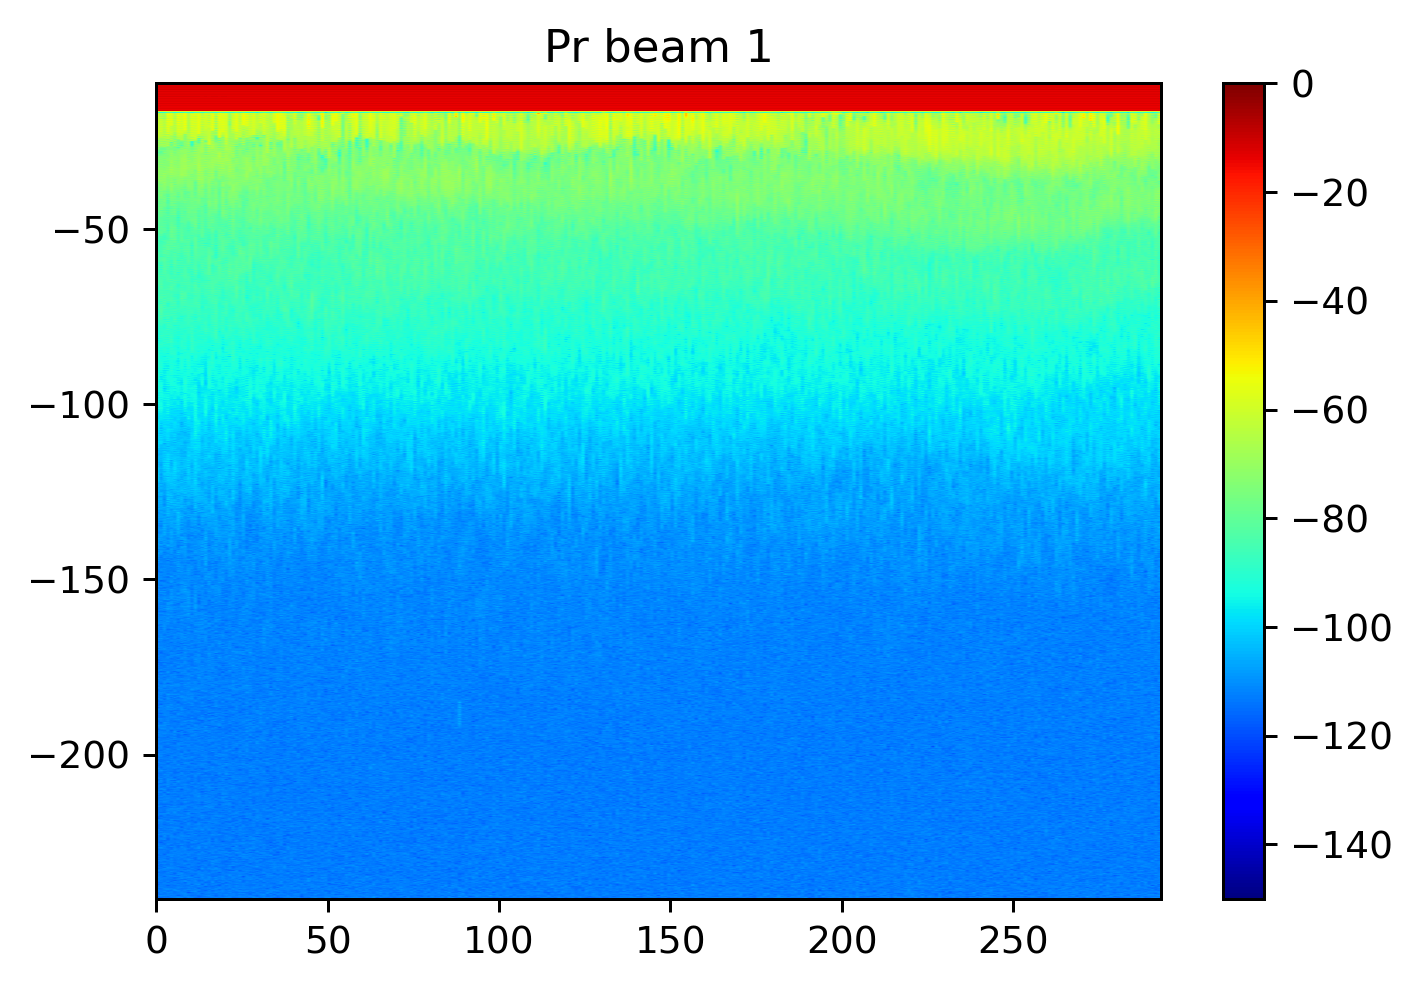

In [10]:
 # Pr is the square magnitude of backscatter
br=reader._get_variable_data(variable_path="/Sonar/Beam_group1/backscatter_r",slice_index={'beam':0})
br=np.asarray(br)
bi=reader._get_vlen_variable(variable_path="/Sonar/Beam_group1/backscatter_i",slice_index={'beam':0})
bi=np.asarray(bi)
nominalTransducerImpedanceTX  = 75
nominalTransducerImpedanceRX  = 75
transducerConductance = 0.0265
current2voltagefactor = 5000 #  version below 2.0 stores current oinstead of voltage multiply by impedance=5000
powerFactor=(1/8)*((nominalTransducerImpedanceTX+nominalTransducerImpedanceRX)/nominalTransducerImpedanceRX)**2 * 1/nominalTransducerImpedanceTX
Pr=(br*br+bi*bi) * transducerConductance * powerFactor*(current2voltagefactor**2) 
Pr_db=10*np.log10(Pr)

#compute the range of each sample
number_of_samples=Pr.shape[0]
indexes=np.arange(0,number_of_samples)
sample_interval=reader._get_variable_data("/Sonar/Beam_group1/sample_interval",slice_index={'beam':0})
temp=np.reshape(sample_interval,(sample_interval.shape[0],1))*np.reshape(indexes,(1,number_of_samples))

sample_time_offset=reader._get_variable_data("/Sonar/Beam_group1/sample_time_offset")
blanking_interval=reader._get_variable_data("/Sonar/Beam_group1/blanking_interval")
celerity=reader._get_variable_data("/Sonar/Beam_group1/sound_speed_at_transducer")
transducer_depth=reader._get_variable_data("/Sonar/Beam_group1/platform_vertical")
transducer_depth=transducer_depth.reshape(transducer_depth.shape[0],1)
offset=sample_time_offset[:]-blanking_interval[:]
offset=offset.reshape(offset.shape[0],1)
celerity_mat=np.reshape(celerity,(celerity.shape[0],1))*np.ones((1,number_of_samples))
transducer_depth_mat=np.reshape(transducer_depth,(transducer_depth.shape[0],1))*np.ones((1,number_of_samples))
depth=(0.5*celerity_mat)*(temp-offset)+transducer_depth_mat
depth=np.transpose(depth)
plot("Pr beam 1",Pr_db,depth[:,0],[-150,0])

#  compute and plot absolute Sv level from Power for beam 1

𝑆𝑣=10𝑙𝑜𝑔10(𝑃𝑟)+20𝑙𝑜𝑔10(𝑟)+2𝛼𝑟−10𝑙𝑜𝑔10(𝑃𝑡𝜆2𝑐𝜓𝜏𝑒32𝜋2)−2𝐺−40𝑙𝑜𝑔10(𝑐𝑜𝑠(𝛾))

>Variable : Sv beam 1
	statistics min:-167.07860432281788 max:-37.08885191712521


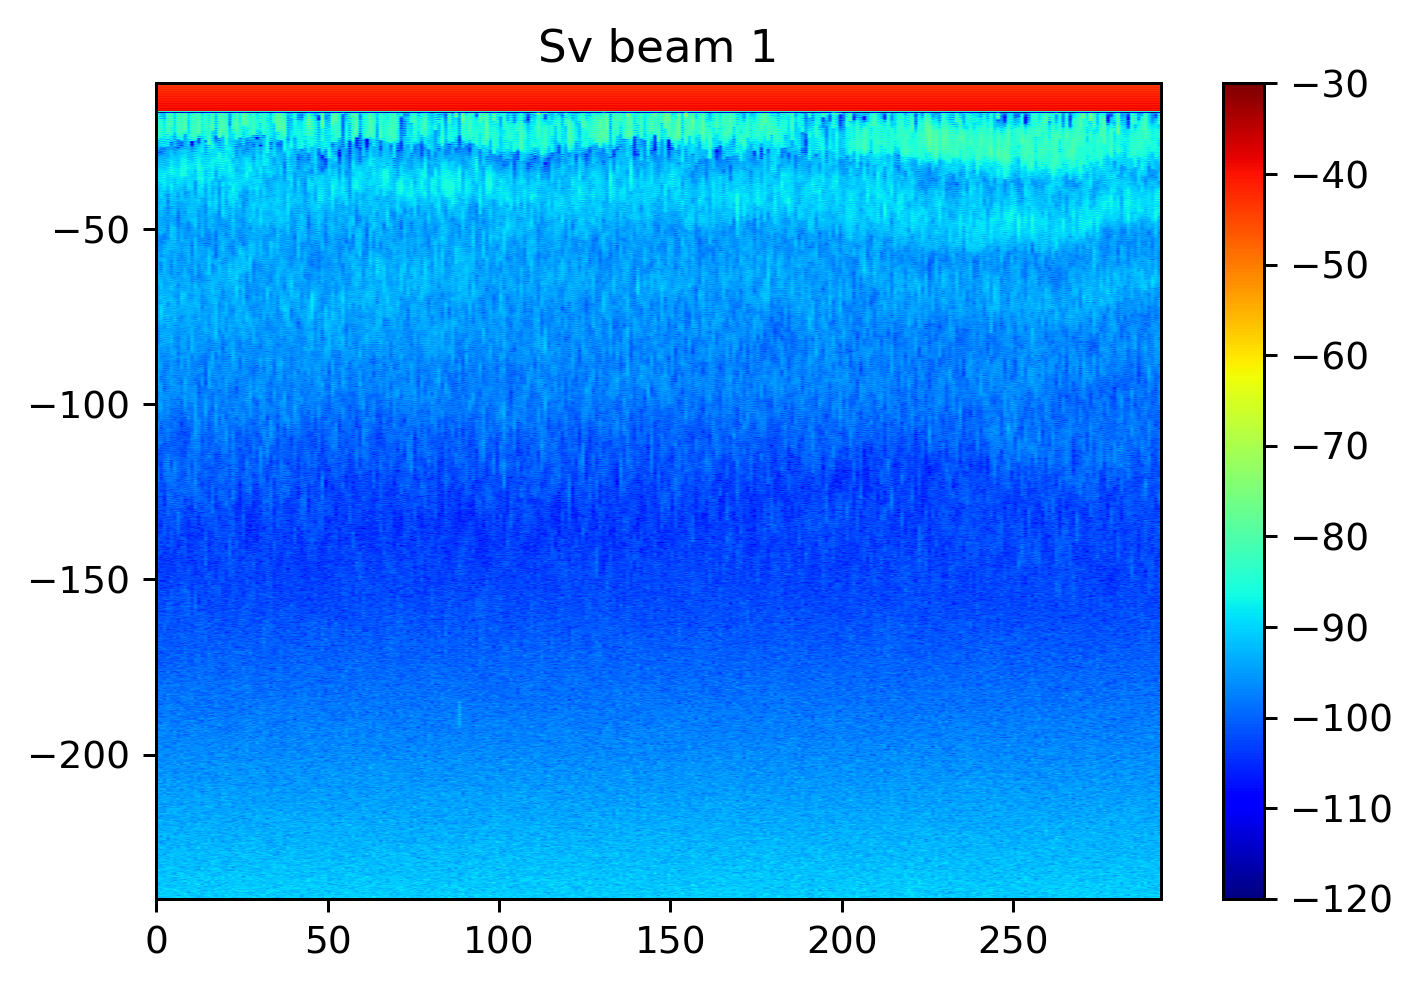

In [11]:
#absorption
absorption=54/1000
#missing value in file

#transmit power per ping
Pt=reader._get_variable_data("/Sonar/Beam_group1/transmit_power")

#acoustic wave length
FqStart=reader._get_variable_data("/Sonar/Beam_group1/transmit_frequency_start")
FqStop=reader._get_variable_data("/Sonar/Beam_group1/transmit_frequency_stop")
FqMean=0.5*np.abs(FqStop[:]+FqStart[:])
lambda_ = np.divide(celerity,FqMean)

#effective pulse duration
Te=reader._get_variable_data("/Sonar/Beam_group1/transmit_duration_equivalent")

#psi
psi=reader._get_variable_data("/Sonar/Beam_group1/equivalent_beam_angle",slice_index={'beam':0})
psi=np.asarray(psi)
psi=psi[:]

#Gain
G= reader._get_variable_data("/Sonar/Beam_group1/transducer_gain",slice_index={'beam':0})
G=np.asarray(G)
G=G[:]
#use default value
G=G+33.1

# Compute Sv

const_coef=celerity/(32*math.pow(math.pi,2))
interm=10*np.log10(Pt*np.power(2,lambda_)*const_coef*Te)+psi+2*G
interm=np.reshape(interm,(interm.shape[0],1))
Sv= 10*np.log10(Pr)+20*np.log10(depth)+2*absorption*depth-np.transpose(interm)

plot("Sv beam 1",Sv,depth[:,0],[-120,-30])
